#**Analisis Faktor Risiko Stunting di Indonesia Tahun 2023**

*   **Penulis**: Mohammad Rafi Habibi Sembiring
*   **Tanggal**: 30 Juni 2025

**Latar Belakang**

Stunting, atau gagal tumbuh pada anak akibat kekurangan gizi kronis, masih menjadi salah satu tantangan kesehatan publik utama di Indonesia. Prevalensinya bervariasi secara signifikan di setiap provinsi, menandakan adanya pengaruh dari berbagai faktor sosio-ekonomi.

Notebook ini bertujuan untuk menganalisis data publik guna mengidentifikasi faktor-faktor sosio-ekonomi yang paling berpengaruh terhadap angka prevalensi stunting di seluruh provinsi Indonesia pada tahun 2023. Hasil analisis ini diharapkan dapat memberikan wawasan berbasis data untuk penentuan prioritas dan perumusan kebijakan yang lebih efektif.

#**Langkah 1: Import Library**

Sel pertama ini digunakan untuk meng-import semua library Python yang kita butuhkan untuk analisis. Ini mencakup library untuk manipulasi data (pandas), serta untuk visualisasi statis dan interaktif (matplotlib, seaborn, plotly). Mengumpulkan semua import di awal adalah praktik terbaik untuk menjaga kerapian kode.

In [8]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_columns', None)

print("Semua library berhasil di-import.")

Semua library berhasil di-import.


#**Langkah 2: Memuat Dataset**

Selanjutnya, kita akan memuat dataset yang telah disiapkan sebelumnya. Dataset ini merupakan gabungan dari data prevalensi stunting (sumber: SKI 2023) dan berbagai data sosio-ekonomi (sumber: BPS 2023).

Kode di bawah ini akan membaca file .csv yang telah diupload ke sesi Google Colab.

In [17]:
nama_file = 'data_stunting_2023.csv'

try:
    df = pd.read_csv(nama_file)
    print(f"Data dari file '{nama_file}' berhasil dimuat!")
    display(df.head())
except FileNotFoundError:
    print(f"Error: File dengan nama '{nama_file}' tidak ditemukan.")
    print("Pastikan nama file sudah benar dan Anda sudah meng-uploadnya.")

Data dari file 'data_stunting_2023.csv' berhasil dimuat!


,Provinsi,Angka_Stunting_2023,Persentase_Kemiskinan_2023,Persentase_Sanitasi_Layak_2023,Tingkat_Pengangguran_Terbuka_2023,Persentase_Akses_Internet_2023
0,ACEH,29.4,14.75,81.43,6.26,67.63
1,SUMATERA UTARA,21.1,8.15,82.01,5.92,71.07
2,SUMATERA BARAT,25.0,5.95,88.24,5.91,76.51
3,RIAU,17.9,6.78,86.97,4.24,78.29
4,JAMBI,18.9,7.58,84.47,4.55,73.13


##**Langkah 3: Deskripsi / Metadata Tiap Kolom**

Penjelasan mengenai arti dan satuan dari setiap kolom yang terdapat dalam dataset.

In [10]:
# Metadata manual
metadata = {
    "Provinsi": "Nama provinsi di Indonesia",
    "Angka_Stunting_2023": "Persentase anak dengan stunting pada tahun 2023",
    "Persentase_Kemiskinan_2023": "Persentase penduduk miskin di tahun 2023",
    "Persentase_Sanitasi_Layak_2023": "Persentase rumah tangga dengan akses sanitasi layak",
    "Tingkat_Pengangguran_Terbuka_2023": "Persentase pengangguran terbuka",
    "Persentase_Akses_Internet_2023": "Persentase penduduk yang memiliki akses internet"
}

# Tampilkan metadata
for col, desc in metadata.items():
    print(f"{col}: {desc}")

Provinsi: Nama provinsi di Indonesia
Angka_Stunting_2023: Persentase anak dengan stunting pada tahun 2023
Persentase_Kemiskinan_2023: Persentase penduduk miskin di tahun 2023
Persentase_Sanitasi_Layak_2023: Persentase rumah tangga dengan akses sanitasi layak
Tingkat_Pengangguran_Terbuka_2023: Persentase pengangguran terbuka
Persentase_Akses_Internet_2023: Persentase penduduk yang memiliki akses internet


#**Langkah 4: Eksplorasi dan Pemahaman Data (EDA)**

Sebelum melakukan analisis mendalam, kita perlu memahami dataset kita terlebih dahulu. Proses ini, yang dikenal sebagai *Exploratory Data Analysis* (EDA), membantu kita memeriksa struktur data, tipe data, dan statistik dasarnya. Tujuannya adalah untuk memastikan data kita bersih, lengkap, dan siap untuk dianalisis lebih lanjut.

In [11]:
# Menampilkan informasi ringkas (tipe data, jumlah data non-null)
print("Informasi DataFrame:")
df.info()

print("\n" + "="*50 + "\n")

# Menampilkan statistik deskriptif (rata-rata, standar deviasi, min, max, dll.)
print("Statistik Deskriptif:")
display(df.describe())

Informasi DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Provinsi                           34 non-null     object 
 1   Angka_Stunting_2023                34 non-null     float64
 2   Persentase_Kemiskinan_2023         34 non-null     float64
 3   Persentase_Sanitasi_Layak_2023     34 non-null     float64
 4   Tingkat_Pengangguran_Terbuka_2023  34 non-null     float64
 5   Persentase_Akses_Internet_2023     34 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB


Statistik Deskriptif:


,Angka_Stunting_2023,Persentase_Kemiskinan_2023,Persentase_Sanitasi_Layak_2023,Tingkat_Pengangguran_Terbuka_2023,Persentase_Akses_Internet_2023
count,34.000000,34.000000,34.000000,34.000000,34.000000
mean,23.282353,10.185294,82.251765,4.780882,70.942941
std,5.764808,5.261917,10.852970,1.597520,10.973695
min,12.200000,4.250000,41.970000,2.440000,38.390000
25%,18.825000,6.387500,80.582500,3.890000,66.562500
50%,22.050000,8.425000,84.545000,4.525000,70.995000
75%,27.775000,12.282500,87.775000,5.860000,78.147500
max,35.300000,26.560000,99.230000,8.130000,92.510000


##**Langkah 5: Cek dan Bersihkan Missing Value**

Pada bagian ini, kita mengecek apakah terdapat data yang hilang (null/missing) dalam dataset dan membersihkannya jika perlu.

In [12]:
# Cek apakah ada nilai yang hilang (missing)
print("\nJumlah missing value tiap kolom:")
print(df.isnull().sum())

# Jika ingin menghapus baris dengan missing value (jika ada)
df_cleaned = df.dropna()

# Cek ulang setelah dibersihkan
print("\nJumlah baris setelah drop NA:", len(df_cleaned))


Jumlah missing value tiap kolom:
Provinsi                             0
Angka_Stunting_2023                  0
Persentase_Kemiskinan_2023           0
Persentase_Sanitasi_Layak_2023       0
Tingkat_Pengangguran_Terbuka_2023    0
Persentase_Akses_Internet_2023       0
dtype: int64

Jumlah baris setelah drop NA: 34


#**Langkah 6: Analisis Korelasi**

Ini adalah inti dari analisis kita. Kita ingin mengetahui seberapa kuat hubungan linear antara angka stunting dengan faktor-faktor lainnya. Kita akan menghitung **matriks korelasi** dan memvisualisasikannya menggunakan **heatmap**.

Heatmap memungkinkan kita untuk dengan cepat melihat variabel mana yang memiliki korelasi positif (searah, ditandai dengan warna hangat seperti merah) dan korelasi negatif (berlawanan arah, ditandai dengan warna dingin seperti biru).

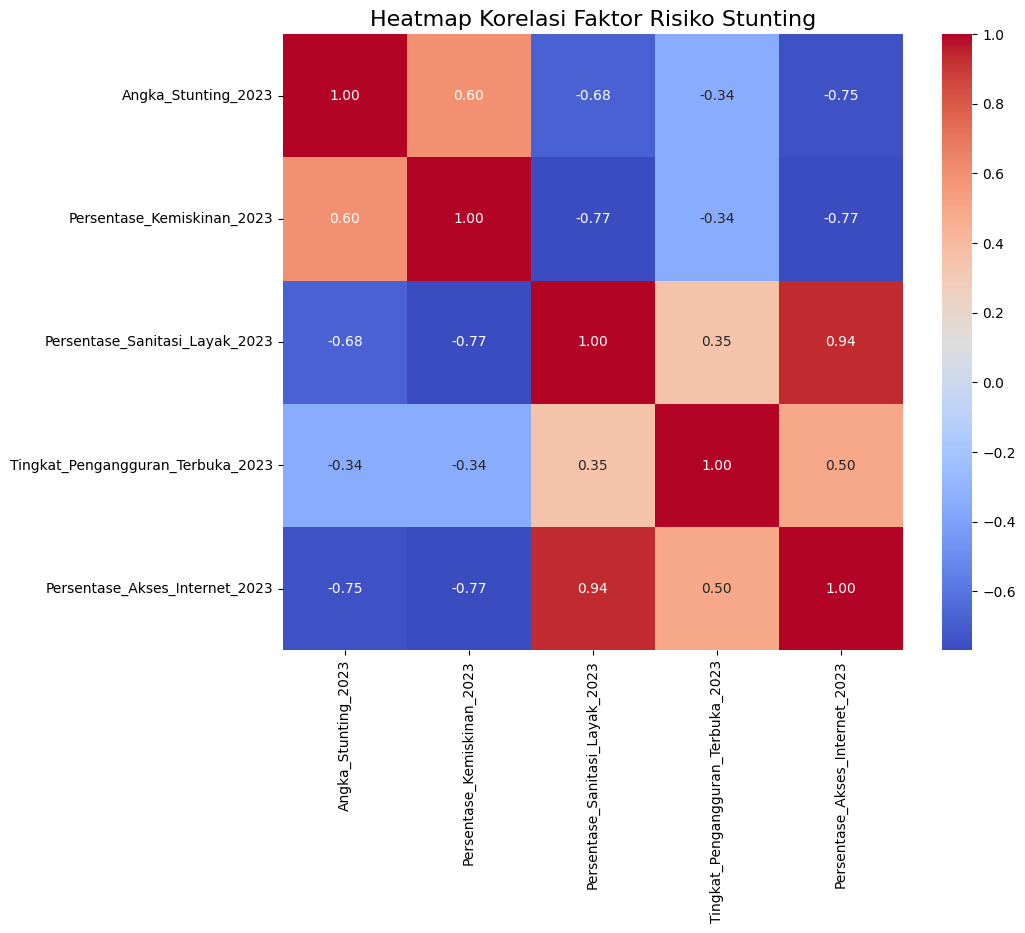

In [13]:
# Menghitung matriks korelasi
correlation_matrix = df.corr(numeric_only=True)

# Membuat visualisasi heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Faktor Risiko Stunting', fontsize=16)
plt.show()

##**Langkah 7: Daftar Kolom dan Posisi Indeks**

Menampilkan daftar semua kolom yang tersedia dalam dataset beserta posisi indeksnya.

In [14]:
print("Daftar kolom dan indeksnya:")
for i, col in enumerate(df.columns):
    print(f"{i}. {col}")

Daftar kolom dan indeksnya:
0. Provinsi
1. Angka_Stunting_2023
2. Persentase_Kemiskinan_2023
3. Persentase_Sanitasi_Layak_2023
4. Tingkat_Pengangguran_Terbuka_2023
5. Persentase_Akses_Internet_2023


#**Langkah 8: Visualisasi - Mengidentifikasi Daerah Prioritas**

Berdasarkan data, kita dapat mengidentifikasi daerah mana yang paling terdampak oleh masalah stunting. Grafik batang di bawah ini akan menyajikan 10 provinsi dengan angka prevalensi stunting tertinggi di tahun 2023. Visualisasi ini sangat penting untuk memahami skala masalah dan dapat menjadi acuan dalam penentuan prioritas intervensi.

In [15]:
# Mengurutkan data dan mengambil 10 provinsi teratas
df_sorted = df.sort_values(by='Angka_Stunting_2023', ascending=False)
top_10_stunting = df_sorted.head(10)

# Membuat grafik batang interaktif
fig_bar = px.bar(top_10_stunting,
                 x='Provinsi',
                 y='Angka_Stunting_2023',
                 title='10 Provinsi dengan Angka Stunting Tertinggi (2023)',
                 labels={'Angka_Stunting_2023': 'Angka Stunting (%)', 'Provinsi': 'Provinsi'},
                 color='Angka_Stunting_2023',
                 color_continuous_scale='Reds')
fig_bar.show()

#**Langkah 9: Visualisasi - Memvalidasi Hubungan Antar Variabel**

Untuk memperkuat temuan dari heatmap korelasi, kita akan membuat **scatter plot**. Grafik ini akan memetakan setiap provinsi sebagai satu titik berdasarkan angka stunting dan angka kemiskinannya.

Adanya **garis tren (trendline)** akan membantu kita melihat pola hubungan secara keseluruhan. Jika garis tren miring ke kanan atas, ini secara visual mengkonfirmasi adanya korelasi positif yang kuat.

In [16]:
# Membuat scatter plot interaktif Stunting vs Kemiskinan
fig_scatter = px.scatter(df,
                         x='Persentase_Kemiskinan_2023',
                         y='Angka_Stunting_2023',
                         hover_name='Provinsi',
                         title='Hubungan Angka Stunting vs Persentase Kemiskinan per Provinsi',
                         labels={'Persentase_Kemiskinan_2023': 'Persentase Kemiskinan (%)', 'Angka_Stunting_2023': 'Angka Stunting (%)'},
                         trendline='ols')

fig_scatter.show()

#**Kesimpulan & Langkah Selanjutnya**

**Temuan Utama**

Dari analisis yang telah dilakukan, dapat ditarik beberapa kesimpulan kunci:

1. Korelasi Positif Kuat: Terdapat korelasi positif yang kuat (+0.75) antara persentase kemiskinan dengan angka stunting. Artinya, provinsi dengan tingkat kemiskinan yang lebih tinggi cenderung memiliki prevalensi stunting yang lebih tinggi pula.

2. Korelasi Negatif Kuat: Sebaliknya, terdapat korelasi negatif yang kuat antara akses sanitasi layak (-0.67) dan akses internet (-0.65) dengan angka stunting. Ini mengindikasikan bahwa perbaikan infrastruktur sanitasi dan peningkatan akses informasi berpotensi menurunkan angka stunting.

3. Daerah Prioritas: Provinsi di wilayah Timur Indonesia, seperti Nusa Tenggara Timur dan Sulawesi Barat, menunjukkan angka stunting tertinggi dan perlu menjadi fokus utama dalam program intervensi.

###**Langkah Selanjutnya**

Notebook ini, dengan dokumentasi lengkapnya, merupakan aset portofolio yang solid. Langkah selanjutnya adalah:

1. Publikasikan ke GitHub: Simpan notebook ini ke dalam sebuah repository di profil GitHub Anda untuk menunjukkan proses analisis Anda.

2. Bangun Dashboard Interaktif: Gunakan wawasan dan visualisasi ini sebagai fondasi untuk membangun dashboard menggunakan tools seperti Tableau Public atau Streamlit, yang memungkinkan pengguna untuk mengeksplorasi data secara mandiri.